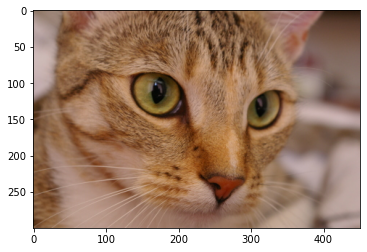

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.data  
img = skimage.data.chelsea()  
# plt.imshow(img)
plt.imshow(img , cmap='gray')

data = img.reshape(1,img.shape[0], img.shape[1], img.shape[2])

np.random.seed(1)

In [178]:
def padding(data):
    data_padded = np.pad(array = data, pad_width = ((0,0),(0 , 0), (0,0), (0,0)),
    mode = 'constant', constant_values = 0)
    return data_padded

A_prev_pad = padding(data)  #adding the padding


In [179]:
def conv_forward(A_org, fil,  stride):
 
  m, org_h, org_w, org_c = A_org.shape
   
  f, f, org_c, n_c = fil.shape
  
  out_h = int((org_h - f )/stride) + 1  ## Calculating the dimension of output image
  out_w = int((org_w - f )/stride) + 1
  
  out_img = np.ones((m, out_h, out_w, n_c))
  h_start=[0]*2
  h_end=[0]*2
  w_start=[0]*2
  w_end=[0]*2
  for i in range(out_h):
    for j in range(out_w):
      for k in range(n_c):
        h_start[0] = i * stride
        h_end[0] = f + h_start[0] 
        w_start[0] = j * stride  ## Convulation process
        w_end[0] = f+ w_start[0] 
  
        out_img[0,i,j,k] = np.sum( np.multiply(A_org[0, h_start[0]:h_end[0], w_start[0]:w_end[0], :] ,fil[:,:,:,k] ) )  
  return out_img

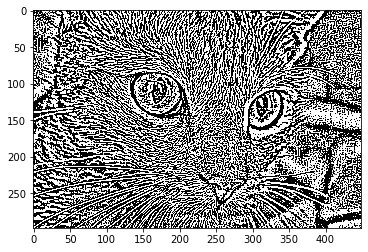

In [180]:
filter = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]).reshape((3,3,1,1)) ## The ken

## The center one is 8 rest are -1 
conv_img = conv_forward(data, filter, 1)
plt.imshow(conv_img[0,:,:,0], cmap='gray',vmin=0, vmax=1)


In [181]:
def conv_backward(out_img, used_filter ,  rate , W , stride):
    filter  = np.zeroes(used_filter.shape)
    (m, out_h, out_w, out_c) = out_img.shape
    (f, f, n_C_prev, n_C) = W.shape

    in_h = ((out_h - 1)*stride) + f
    in_w = ((out_w - 1)*stride) + f
    in_h=[0]*2
    out_h=[0]*2
    in_w=[0]*2
    out_w=[0]*2
    org_img = np.ones((m, in_h, in_w, n_C))

    for i in range(out_h):
        for j in range(out_w):
            for k in range(n_C):
                out_h[0] = i / stride
                out_w[0] = j / stride  ## back ward Convulation process
                in_h[0] = out_h[0] - f
                in_w = out_h[0] - f
    org_img[0,i,j,k] = np.sum( np.multiply(out_img[0, in_h[0]:out_h[0], in_w[0]:out_w[0], :] ,W[:,:,:,k] ) ) 
    return org_img
                
    
    



In [182]:
def max_pool_forward(input, stride , filter_size) :
    m, h_prev, w_prev, c_prev = input.shape
    h_out = int(((h_prev - filter_size)/stride) + 1)
    w_out = int(((w_prev -filter_size)/stride) + 1)

    output = np.zeros((m, h_out, w_out, c_prev))

    h_start=[0]*2
    h_end=[0]*2
    w_start=[0]*2
    w_end=[0]*2
    for i in range(c_prev):
        for j in range(h_out):
            for k in range(w_out):
                w_start[0] = k * stride
                w_end[0] = w_start[0] + filter_size
                h_start[0] = j * stride
                h_end[0] = h_start[0] + filter_size
                output[0, j, k, i] = np.max(input[0,h_start[0]:h_end[0], w_start[0]:w_end[0], i])
    output.shape == (m, h_out, w_out, c_prev)
    return output



The Dimension of the image before pooling are  (1, 298, 449, 1)
The Dimension of the image after pooling are  (1, 149, 225, 3)


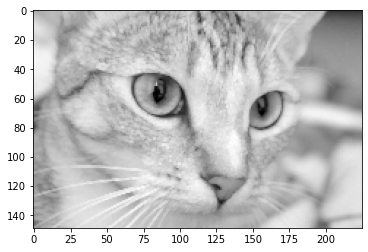

In [183]:
pooled_img =  max_pool_forward(data, 2 , 3) ## Stride = 2
plt.imshow(pooled_img[0,:,:,0], cmap = "gray")
print("The Dimension of the image before pooling are ", conv_img.shape)
print("The Dimension of the image after pooling are ", pooled_img.shape)